In [183]:
from trectools import TrecQrel, procedures, TrecEval, TrecRun
import pandas as pd, seaborn as sns

In [184]:
depth = 10
metric = 'P@'+str(depth)
metric='recip_rank@'+str(depth)

In [208]:
# We load a qrel object from a file:

qrels_file = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/qrels/qrels.msmarco-entrypage-popular2.txt"
print('dev qrels loaded')
    
qrels = TrecQrel(qrels_file)

# Internally TrecTools save the objects as Pandas dataframes
qrels.qrels_data.head()

dev qrels loaded


,query,q0,docid,rel
0,0,0,D3345031,1
1,1,0,D1074718,1
2,2,0,D2576615,1
3,3,0,D260453,1
4,4,0,D1594394,1


In [209]:
# A typical evaluation workflow

runs_dir = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/entrypage"

contexts = ['at', 'content']

metricResults = []

for context in contexts:
    print("/run.msmarco-doc.entrypage-popular-"+context+"2.bm25-default.dev.txt")
    run = TrecRun(runs_dir + "/run.msmarco-doc.entrypage-popular-"+context+"2.bm25-default.dev.txt")
    te = TrecEval(run, qrels)
    metricResults.append((te. get_reciprocal_rank(per_query=True, depth=depth), context))
    print(te.get_ndcg(per_query=False, depth=depth))
print("done!")

/run.msmarco-doc.entrypage-popular-at2.bm25-default.dev.txt
0.6145894330685233
/run.msmarco-doc.entrypage-popular-content2.bm25-default.dev.txt
0.019253600073821854
done!


In [195]:
# A typical evaluation workflow

runs_dir = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/entrypage"

contexts = ['at', 'content']

metricResults = []

for context in contexts:
    print("/run.msmarco-doc.entrypage-random-"+context+".bm25-default.dev.txt")
    run = TrecRun(runs_dir + "/run.msmarco-doc.entrypage-random-"+context+".bm25-default.dev.txt")
    te = TrecEval(run, qrels)
    for i in range(1, 12):
        if i==11: i=100
        metricResults.append((te.get_relevant_retrieved_documents(per_query=False, depth=i), context, 'P@'+str(i)))
print("done!")

/run.msmarco-doc.entrypage-random-at.bm25-default.dev.txt


TypeError: get_relevant_retrieved_documents() got an unexpected keyword argument 'depth'

In [51]:
metricResults

[(0.72, 'at', 'P@1'),
 (0.77, 'at', 'P@2'),
 (0.7866666666666666, 'at', 'P@3'),
 (0.7916666666666665, 'at', 'P@4'),
 (0.7916666666666665, 'at', 'P@5'),
 (0.7966666666666665, 'at', 'P@6'),
 (0.7966666666666665, 'at', 'P@7'),
 (0.7966666666666665, 'at', 'P@8'),
 (0.7966666666666665, 'at', 'P@9'),
 (0.7966666666666665, 'at', 'P@10'),
 (0.7972361581920903, 'at', 'P@100'),
 (0.29896907216494845, 'content', 'P@1'),
 (0.32989690721649484, 'content', 'P@2'),
 (0.33333333333333326, 'content', 'P@3'),
 (0.33591065292096217, 'content', 'P@4'),
 (0.34415807560137457, 'content', 'P@5'),
 (0.3458762886597938, 'content', 'P@6'),
 (0.3458762886597938, 'content', 'P@7'),
 (0.34716494845360824, 'content', 'P@8'),
 (0.3483104238258877, 'content', 'P@9'),
 (0.3483104238258877, 'content', 'P@10'),
 (0.35482642021819766, 'content', 'P@100')]

In [199]:
typedResults = []

for metricRes in metricResults:
    metricRes[0]['type'] = metricRes[1]
    typedResults.append(metricRes[0])

result_map = pd.concat(typedResults, axis=0)
result_map

,recip_rank@10,type
query,,
0,1.0,at
1,0.5,at
2,1.0,at
3,1.0,at
4,1.0,at
...,...,...
94,NaN,content
95,NaN,content
96,NaN,content


In [200]:
plot_orders = []

for typedRes in typedResults:
    plot_order = typedRes.sort_values(by=metric, ascending=False)
    plot_order.insert(0, 'Query', range(0, len(plot_order)))
    plot_orders.append(plot_order)
    
result_map = pd.concat(plot_orders)

result_map

,Query,recip_rank@10,type
query,,,
0,0,1.0,at
68,1,1.0,at
65,2,1.0,at
63,3,1.0,at
61,4,1.0,at
...,...,...,...
94,92,NaN,content
95,93,NaN,content
96,94,NaN,content


In [205]:
result_map2 = result_map.fillna(0)
#result_map2['recip_rank@10'] = result_map2['recip_rank@10'].apply(lambda x: str('>10') if x == 0 else int(1/x))
result_map2 = result_map2.groupby(['recip_rank@10', 'type']).count()
result_map2 = result_map2.reset_index()

#result_map2 = result_map2.append({'recip_rank@10':1/7, 'type':'at', 'Query':0}, ignore_index=True).append({'recip_rank@10':0.1, 'type':'at', 'Query':0}, ignore_index=True)
result_map2 = result_map2.append({'recip_rank@10':1/5, 'type':'content', 'Query':0}, ignore_index=True).append({'recip_rank@10':1/8, 'type':'at', 'Query':0}, ignore_index=True)

result_map2 = result_map2.sort_values('recip_rank@10', ascending=False)
result_map2['recip_rank@10'] = result_map2['recip_rank@10'].apply(lambda x: str('>10') if x == 0 else int(1/x))
result_map2.columns = ['Rang korrekter Antwort', 'Methode', 'Anzahl topics']
result_map2['Methode'] = result_map2['Methode'].apply(lambda x: str('Anchor Text') if x == 'at' else 'Content')

result_map2

,Rang korrekter Antwort,Methode,Anzahl topics
16,1,Content,13
15,1,Anchor Text,65
13,2,Anchor Text,10
14,2,Content,6
11,3,Anchor Text,7
12,3,Content,5
9,4,Anchor Text,1
10,4,Content,2
17,5,Content,0
8,5,Anchor Text,1


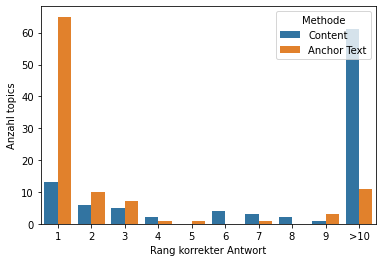

In [206]:
plot = sns.barplot(x="Rang korrekter Antwort", y="Anzahl topics", hue="Methode", data=result_map2) #, order=plot_order)
fig4 = plot.get_figure()
fig4.savefig("entrypage_positions_random2.pdf")

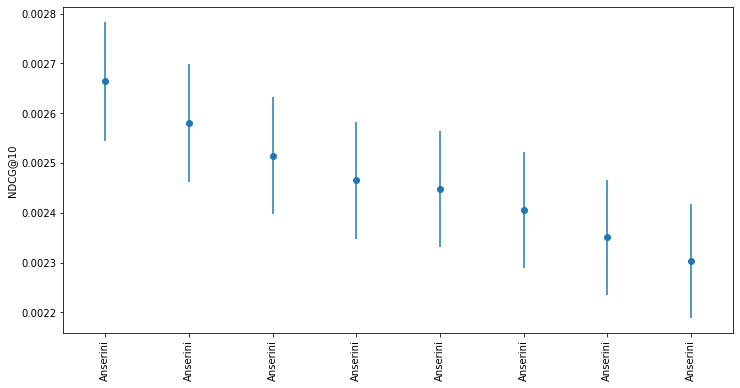

In [119]:
ndcg10 = procedures.extract_metric_from_results(results, "P_100")
fig5 = procedures.plot_system_rank(ndcg10, display_metric="NDCG@10")

In [147]:
result_map_wide = result_map.pivot(columns="type", values="MAP@1000")

result_map_wide.loc[(result_map_wide['anchor-text'] < 0.4) & (result_map_wide['anchor-text'] > 0.2)]

type,anchor-text,content,content_matched,orcas
query,,,,
10264,0.250000,0.166667,0.250000,0.000000
26207,0.250000,0.500000,1.000000,1.000000
34015,0.333333,1.000000,1.000000,0.000000
51276,0.250000,0.090909,0.166667,0.083333
97972,0.333333,0.002387,0.004098,0.052632
...,...,...,...,...
1097359,0.333333,0.142857,0.500000,1.000000
1099452,0.333333,0.001946,0.003067,0.500000
1100415,0.333333,0.000000,0.000000,1.000000


In [107]:
1/0.0

ZeroDivisionError: float division by zero